In [67]:
%matplotlib notebook

In [1]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk

In [2]:
s, fs = sf.read('xmazak02.wav')
s = s[:250000]
t = np.arange(s.size) / fs

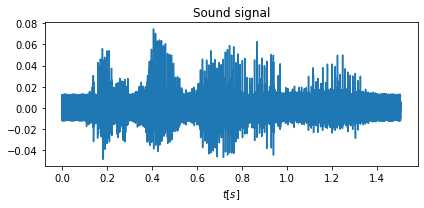

In [3]:
plt.figure(figsize=(6,3))
plt.plot(t, s)
plt.style.use('seaborn-dark')
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Sound signal')
plt.tight_layout()
plt.show()

In [4]:
import soundfile
data, fs = soundfile.read('xmazak02.wav')
print('minimum = {}'.format(data.min()))
print('maximum = {}'.format(data.max()))

minimum = -0.048492431640625
maximum = 0.07452392578125


In [5]:
import soundfile as sf
f = sf.SoundFile('xmazak02.wav')
print('samples = {}'.format(f.frames))
print('sample rate = {}'.format(f.samplerate))
print('seconds = {}'.format(f.frames / f.samplerate))

samples = 24064
sample rate = 16000
seconds = 1.504


In [6]:
import soundfile
data, fs = soundfile.read('xmazak02.wav')
mean = np.mean(data)
print('mean = {}'.format(mean))

mean = -1.2264606800485164e-05


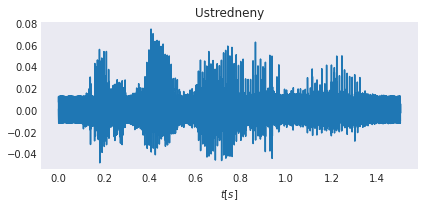

In [7]:
data = data - mean
s = data
plt.figure(figsize=(6,3))
plt.plot(t, s)
plt.style.use('seaborn-dark')
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Ustredneny')
plt.tight_layout()
plt.show()


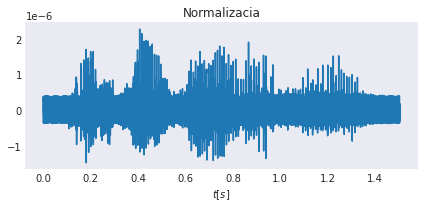

In [8]:
s = s / 2**15
plt.figure(figsize=(6,3))
plt.plot(t, s)
plt.style.use('seaborn-dark')
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Normalizacia')
plt.tight_layout()
plt.show()

In [9]:
N = 24064
lram = 1024
pram = 512
sram = 512
nram = (N - lram) /sram
print('num of frames = {}'.format(nram))

num of frames = 45.0


In [10]:
print('size = {}'.format(s.size))

size = 24064


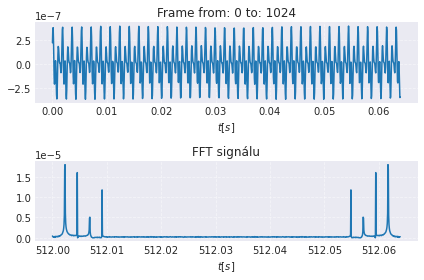

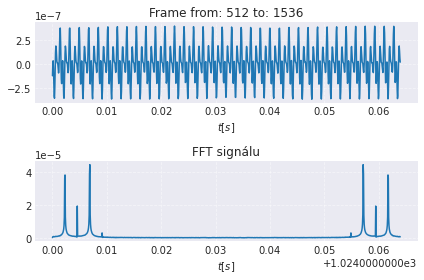

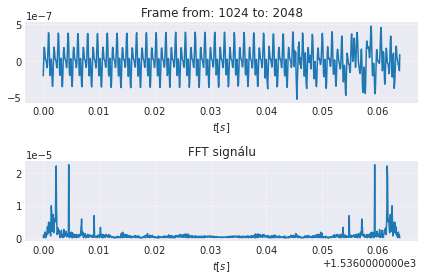

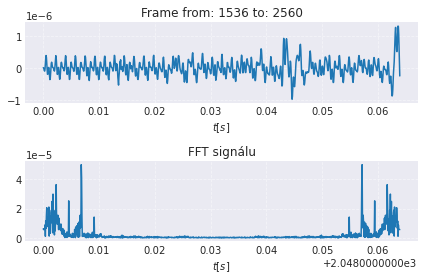

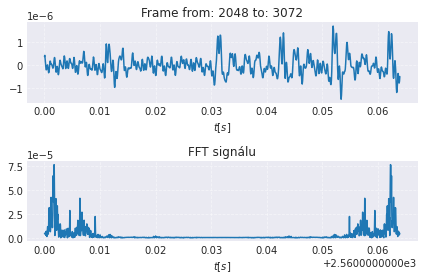

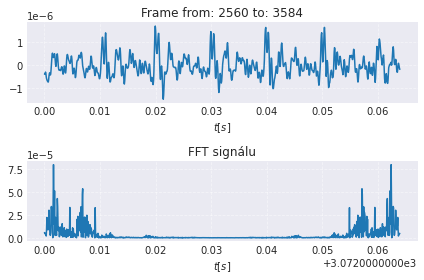

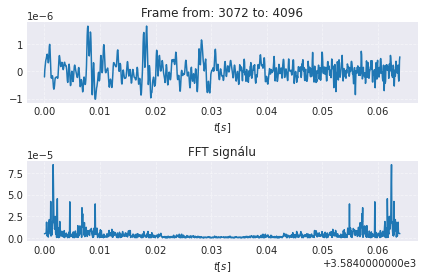

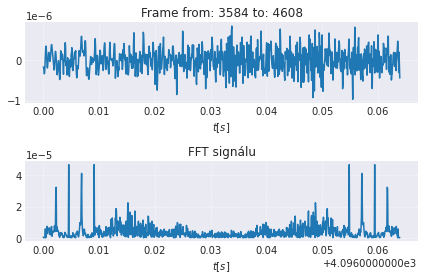

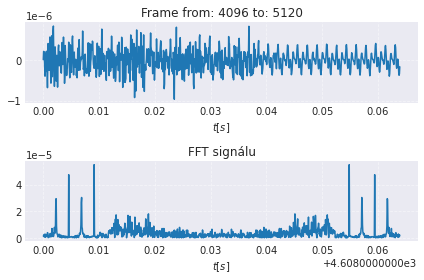

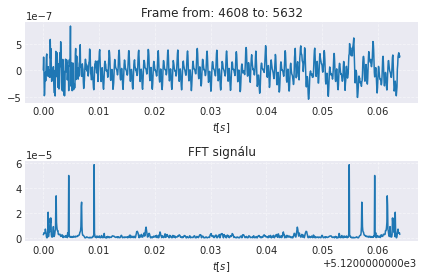

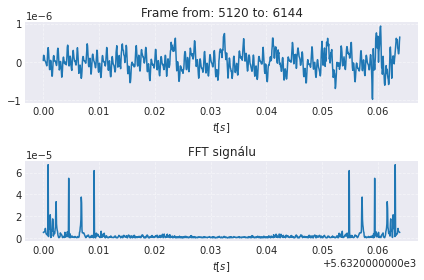

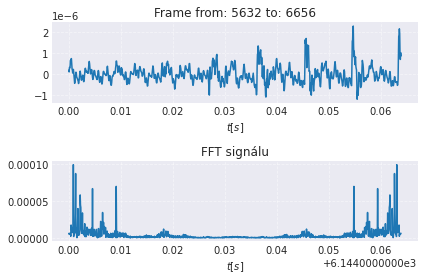

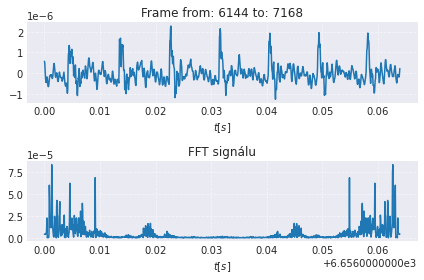

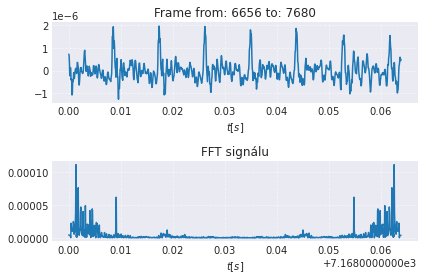

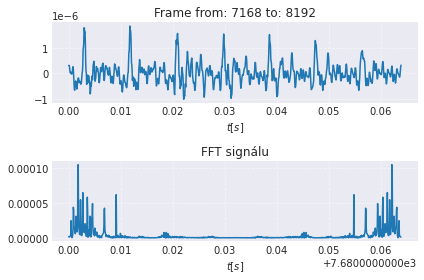

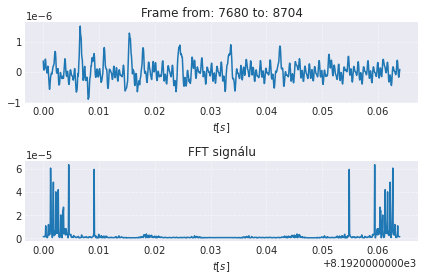

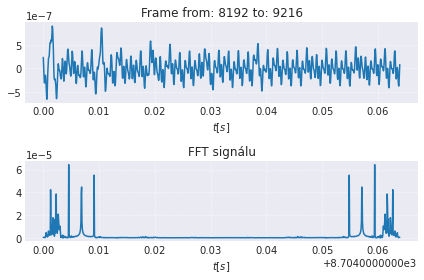

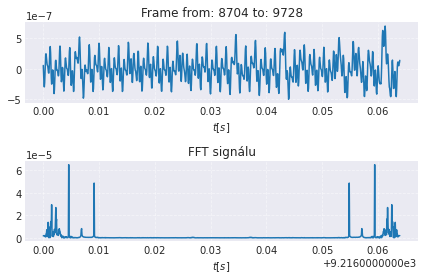

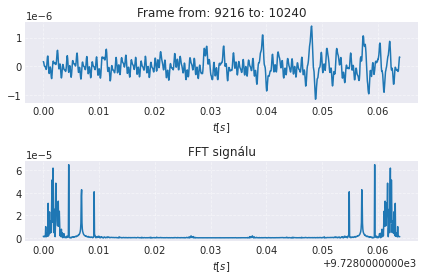

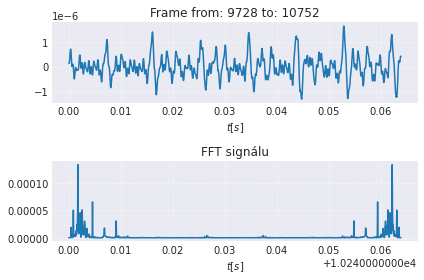

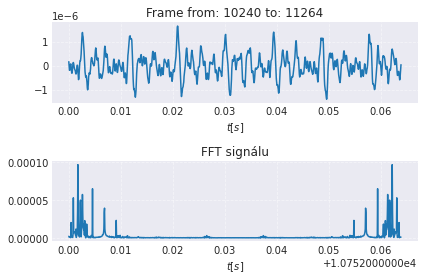

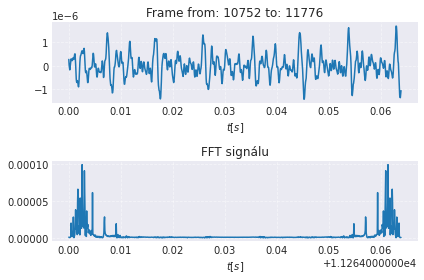

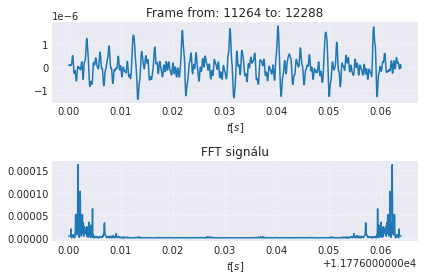

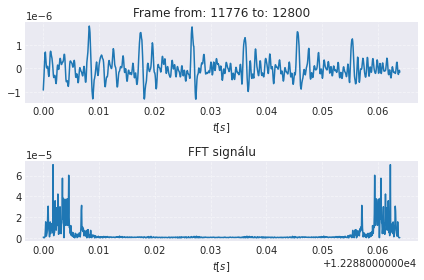

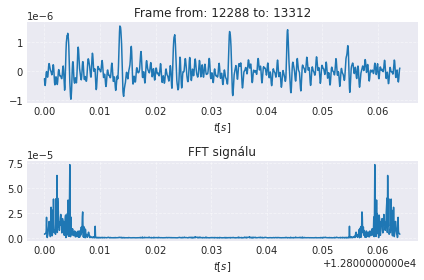

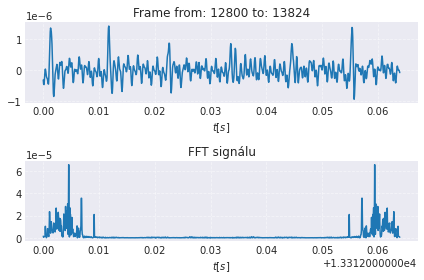

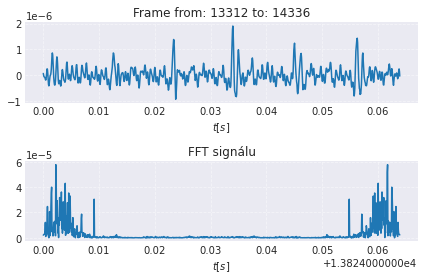

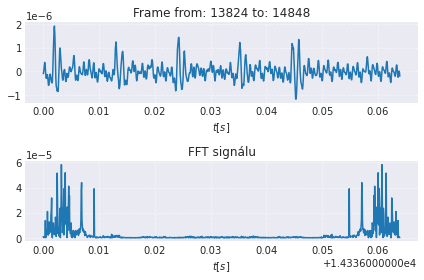

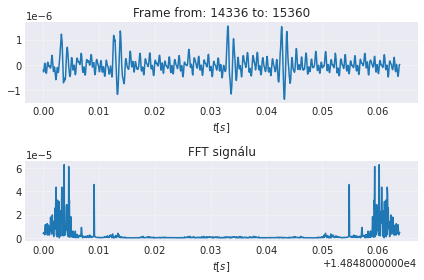

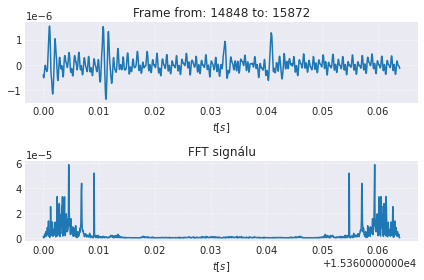

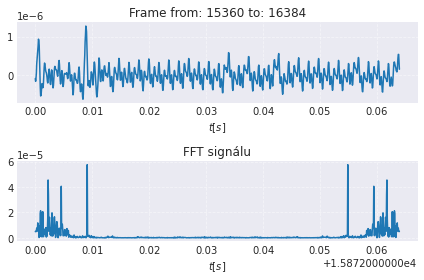

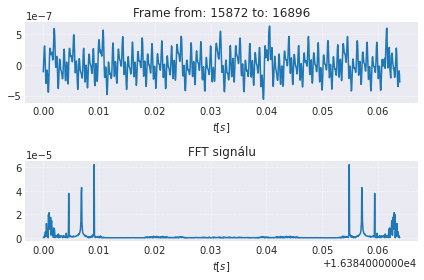

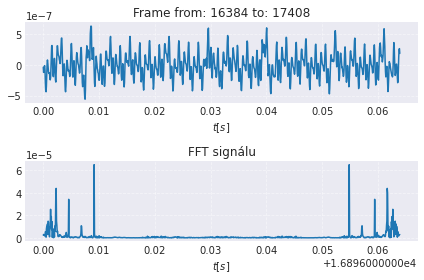

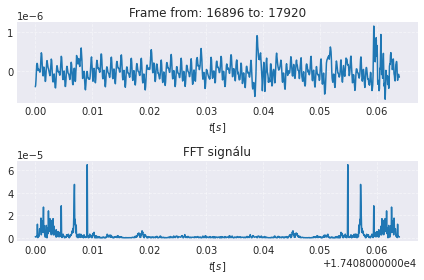

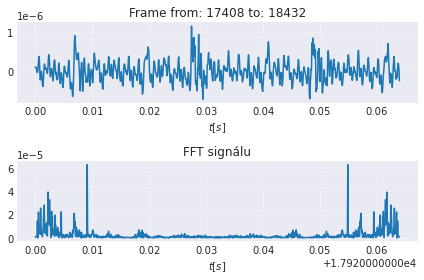

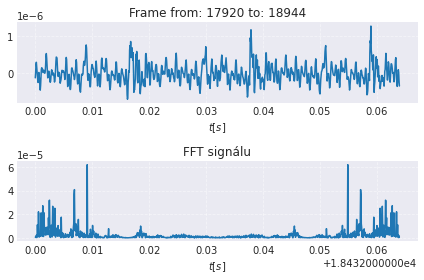

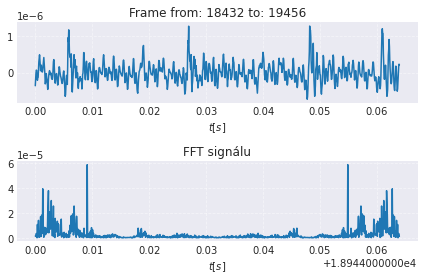

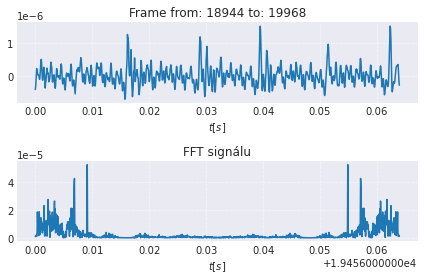

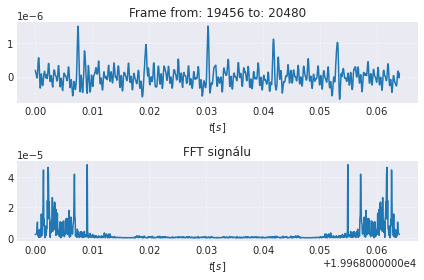

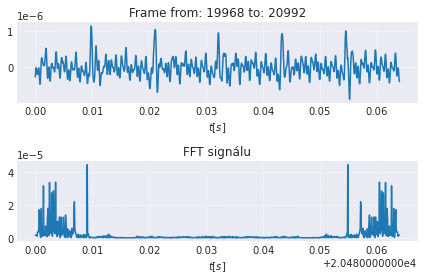

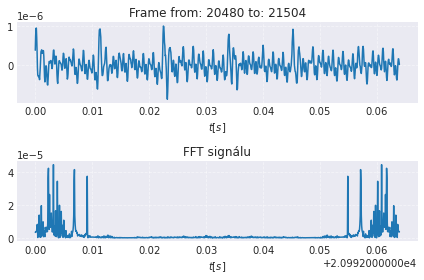

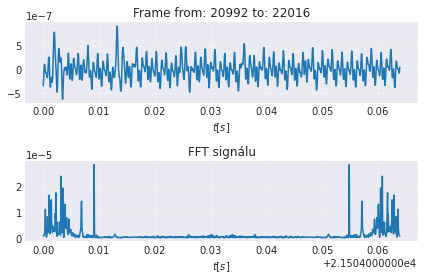

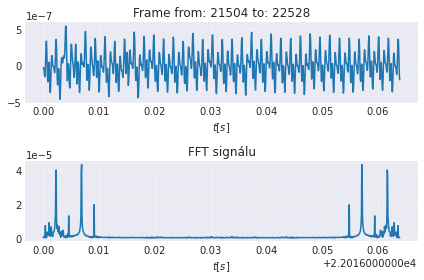

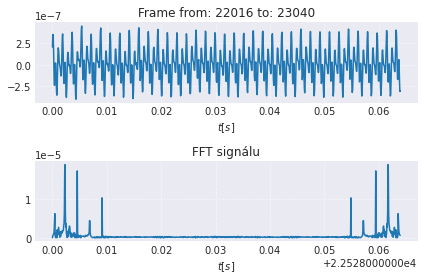

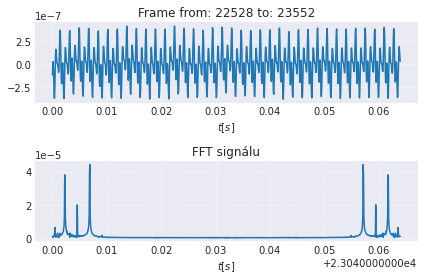

In [11]:
i = 1024
o = 0
for x in range(int(nram)):
         y = s[o:i]
         _, ax = plt.subplots(2, 1)
    
         ax[0].plot(np.arange(y.size) / fs, y)
         ax[0].set_xlabel('$t[s]$')
         ax[0].set_ylabel('')
         ax[0].set_title('Frame from: ' + str(o) + ' to: ' + str(i))
         ax[0].grid(alpha=0.5, linestyle='--')
         i += 512  
         o += 512  


         N = y.size
         y_seg_spec = np.fft.fft(y)
         # np.arange(n) vytváří pole 0..n-1 podobně jako obyč Pythonovský range
         ax[1].plot(np.arange(y.size) / fs + o, abs(np.real(y_seg_spec)))
         ax[1].set_xlabel('$t[s]$')
         ax[1].set_title('FFT signálu')
         ax[1].grid(alpha=0.5, linestyle='--')
    
         plt.tight_layout()
         plt.show()

In [12]:

start = 11264
end = 12288
s_seg = s[start:end]
N = s_seg.size

s_seg_spec = np.fft.fft(s_seg)
G = 10 * np.log10(1/N *np.abs(s_seg_spec)**2)


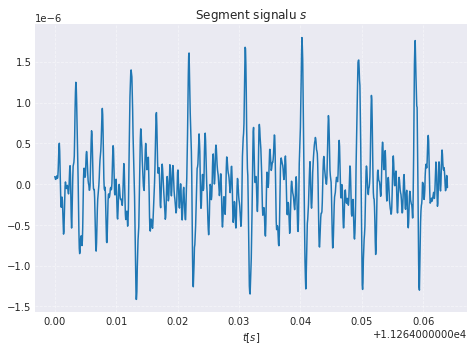

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# np.arange(n) vytváří pole 0..n-1 podobně jako obyč Pythonovský range
ax.plot(np.arange(s_seg.size) / fs + start, s_seg)
ax.set_xlabel('$t[s]$')
ax.set_title('Segment signalu $s$')
ax.grid(alpha=0.5, linestyle='--')

In [16]:
s_seg_spec = np.fft.fft(s_seg)
f = np.arange(s_seg_spec.size)

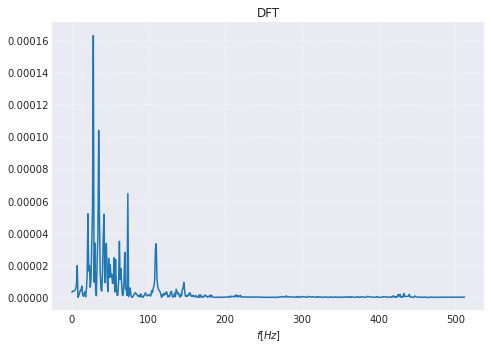

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#ax.plot(f,abs(s_seg_spec))
plt.plot(f[:f.size//2+1], np.abs(np.real(s_seg_spec[:s_seg_spec.size//2+1])))
ax.set_xlabel('$f[Hz]$')
ax.set_title('DFT')
ax.grid(alpha=0.5, linestyle='--')


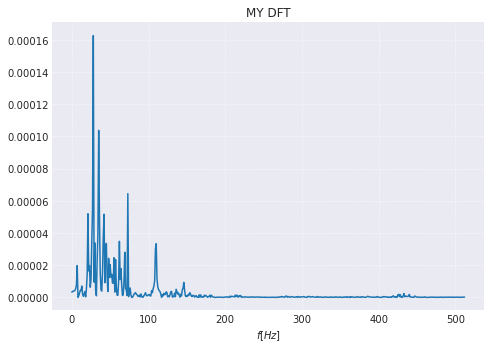

In [18]:
# FINALLY MY DFT
s_seg = s_seg.astype(np.complex128)
N = len(s_seg)
dft = np.zeros((1024,1024), dtype = np.complex128)
for n in range(1024):
    for k in range(1024):
        dft[k,n] = np.exp(-2j * np.pi *k *n / N)
my_dft = np.dot(dft,s_seg)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
f = np.arange(s_seg.size) 

plt.plot(f[:f.size//2+1], np.abs(np.real(my_dft[:my_dft.size//2+1])))
ax.set_xlabel('$f[Hz]$')
ax.set_title('MY DFT')
ax.grid(alpha=0.5, linestyle='--')

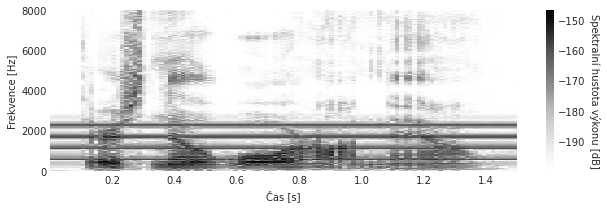

In [19]:
# spectogram
f, t, sgr = spectrogram(s, fs)
# prevod na PSD
# (ve spektrogramu se obcas objevuji nuly, ktere se nelibi logaritmu, proto +1e-20)
sgr_log = 10 * np.log10(sgr+1e-20) 

plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

In [20]:
print('len of signal = {}'.format(len(s)))
print('len of signal = {}'.format(fs))

len of signal = 24064
len of signal = 16000


In [22]:
# ulozenie ramcov do stlpcov matice
import soundfile
data, fs = soundfile.read('xmazak02.wav')
s = s - np.mean(s)
s /= np.abs(s).max()
length = len(s)
hop = 512
size = 1024
nram = (length - size) /hop
nram = int(nram)
frames = np.ndarray((nram, size))
beg = 0
end = 1024
for k in range (0, nram):
    for i in range(beg,end):
        frames[k][0] = s[i]
    beg += 512
    end += 512

dft_frames = np.ndarray((len(frames),1024),dtype="complex")
for i in range(len(frames)):
    dft_frames[i] = np.fft.fft(frames[i],1024)
    





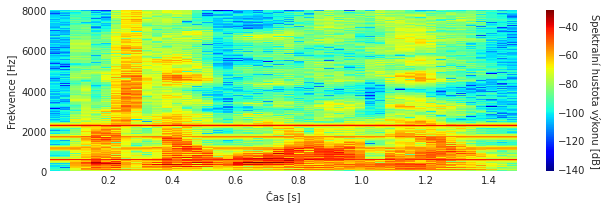

In [46]:
# spectogram
f, t, sgr = spectrogram(s, fs, nperseg = 1024, noverlap = 512)
sgr_log = 10 * np.log10(sgr+1e-20)
plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sgr_log,cmap = 'jet')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

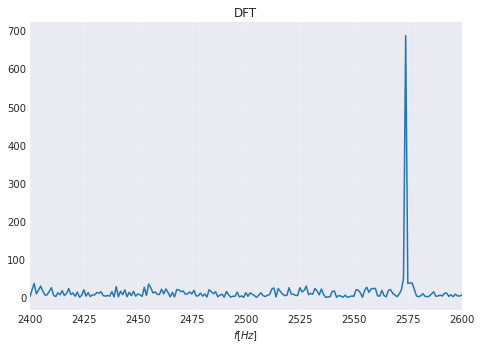

In [24]:

dft_signal = np.fft.fft(s)
f = np.arange(dft_signal.size)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#ax.plot(f,abs(s_seg_spec))
plt.plot(f[:f.size//2+1], np.abs(np.real(dft_signal[:dft_signal.size//2+1])))
ax.set_xlabel('$f[Hz]$')
ax.set_title('DFT')
plt.xlim([2400,2600])
ax.grid(alpha=0.25, linestyle='-')


In [25]:
# my own piip
import scipy.io.wavfile
array = []

for i in range(len(s)):
    array.append(i/fs)

cos1 = np.cos(2 * np.pi *575 * np.array(array))
cos2 = np.cos(2 * np.pi *1150 * np.array(array))
cos3 = np.cos(2 * np.pi *1725 * np.array(array))
cos4 = np.cos(2 * np.pi *2275 * np.array(array))

final_cos = cos1 + cos2 + cos3 + cos4
scipy.io.wavfile.write("4cos.wav", fs, final_cos)


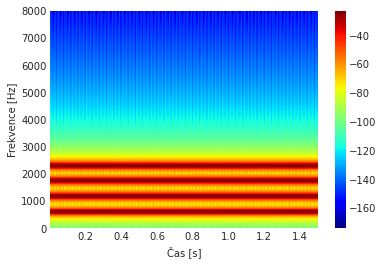

In [26]:
plt.specgram(final_cos,Fs = fs,cmap = 'jet')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
plt.colorbar()
plt.show()

In [27]:
f1 = 575
f2 = 1150
f3 = 1725
f4 = 2275
x = fs/2

In [28]:
from scipy import signal
import matplotlib.pyplot as plt

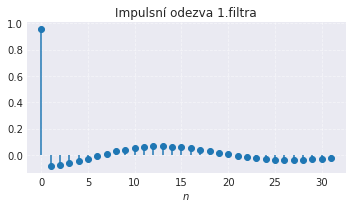

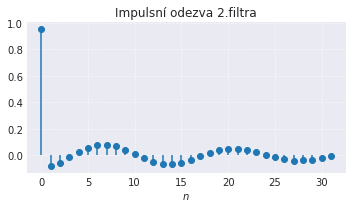

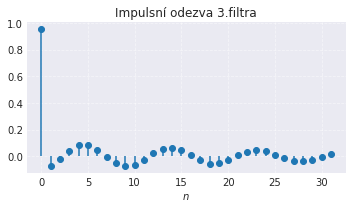

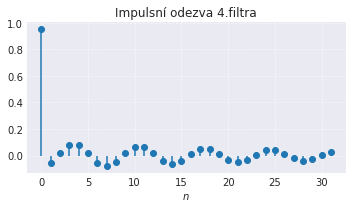

In [31]:
N, Wn = signal.buttord([(f1 -90)/x, (f1+90)/x],[(f1-30)/x, (f1 +30)/x],3,10,False)
b,a = scipy.signal.butter(N, Wn, btype='bandstop', analog=False, output='ba', fs=None)
N_imp = 32
imp = [1, *np.zeros(N_imp-1)]
h = lfilter(b, a, imp)

plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva 1.filtra')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()


N, Wn = signal.buttord([(f2 -90)/x, (f2+90)/x],[(f2-30)/x, (f2 +30)/x],3,10,False)
b,a = scipy.signal.butter(N, Wn, btype='bandstop', analog=False, output='ba', fs=None)
N_imp = 32
imp = [1, *np.zeros(N_imp-1)]
h = lfilter(b, a, imp)

plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva 2.filtra')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
N, Wn = signal.buttord([(f3 -90)/x, (f3+90)/x],[(f3-30)/x, (f3 +30)/x],3,10,False)
b,a = scipy.signal.butter(N, Wn, btype='bandstop', analog=False, output='ba', fs=None)
N_imp = 32
imp = [1, *np.zeros(N_imp-1)]
h = lfilter(b, a, imp)

plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva 3.filtra')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
N, Wn = signal.buttord([(f4 -90)/x, (f4+90)/x],[(f4-30)/x, (f4 +30)/x],3,10,False)
b,a = scipy.signal.butter(N, Wn, btype='bandstop', analog=False, output='ba', fs=None)
N_imp = 32
imp = [1, *np.zeros(N_imp-1)]
h = lfilter(b, a, imp)

plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva 4.filtra')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()



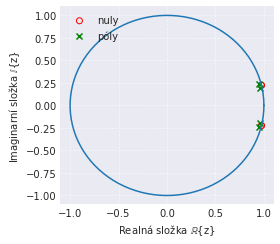

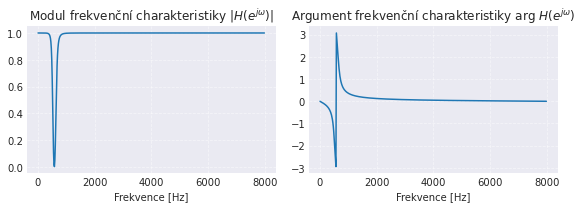

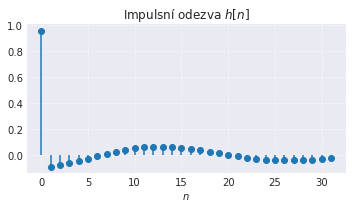

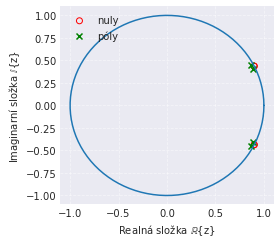

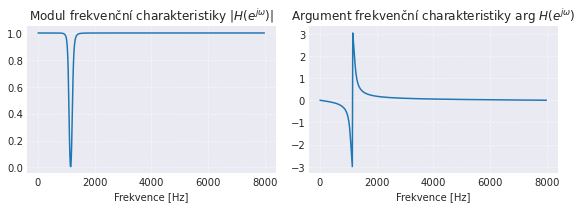

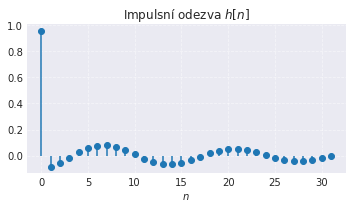

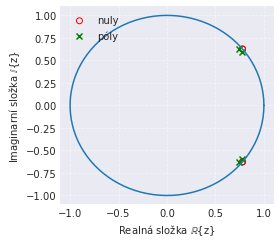

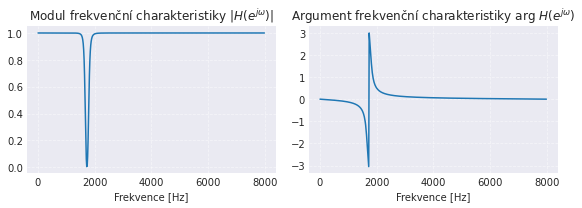

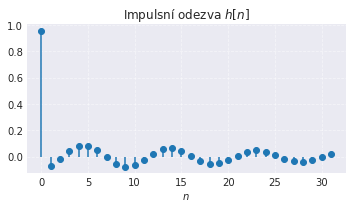

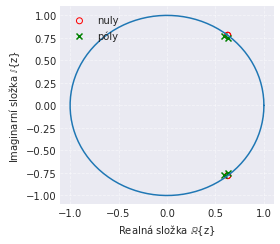

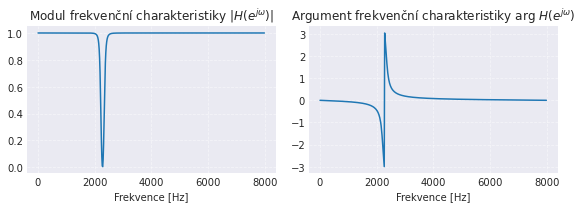

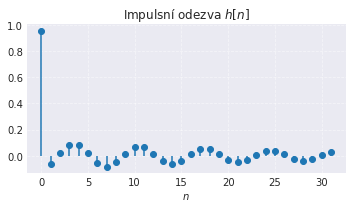

In [32]:
for f in (f1,f2,f3,f4):
    N, Wn = signal.buttord([(f -90)/x, (f+90)/x],[(f-30)/x, (f +30)/x],3,10,False)
    b,a = scipy.signal.butter(N, Wn, btype='bandstop', analog=False, output='ba', fs=None)
  
    # nuly, poly
    z, p, k = tf2zpk(b, a)
    # frekvencni charakteristika
    w, H = freqz(b, a)

    # impulsni odezva
    N_imp = 32
    imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls
    h = lfilter(b, a, imp)

    plt.figure(figsize=(4,3.5))

    # jednotkova kruznice
    ang = np.linspace(0, 2*np.pi,100)
    plt.plot(np.cos(ang), np.sin(ang))
    
    # nuly, poly
    plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')

    plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
    plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')

    plt.grid(alpha=0.5, linestyle='--')
    plt.legend(loc='upper left')

    plt.tight_layout()

    _, ax = plt.subplots(1, 2, figsize=(8,3))

    ax[0].plot(w / 2 / np.pi * fs, np.abs(H))
    ax[0].set_xlabel('Frekvence [Hz]')
    ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

    ax[1].plot(w / 2 / np.pi * fs, np.angle(H))
    ax[1].set_xlabel('Frekvence [Hz]')
    ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

    for ax1 in ax:
        ax1.grid(alpha=0.5, linestyle='--')

    plt.tight_layout()

    plt.figure(figsize=(5,3))
    plt.stem(np.arange(N_imp), h, basefmt=' ')
    plt.gca().set_xlabel('$n$')
    plt.gca().set_title('Impulsní odezva $h[n]$')

    plt.grid(alpha=0.5, linestyle='--')

    plt.tight_layout()

   


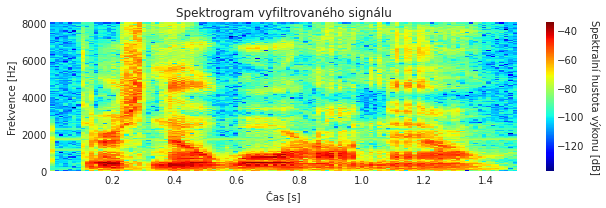

In [40]:
    N, Wn = signal.buttord([(f1 -90)/x, (f1+90)/x],[(f1-30)/x, (f1 +30)/x],3,10,False)
    b,a = scipy.signal.butter(N, Wn, btype='bandstop', analog=False, output='ba', fs=None)
    # filtrace
    sf = lfilter(b, a, s)
    N, Wn = signal.buttord([(f2 -90)/x, (f2+90)/x],[(f2-30)/x, (f2 +30)/x],3,10,False)
    b,a = scipy.signal.butter(N, Wn, btype='bandstop', analog=False, output='ba', fs=None)
    sf = lfilter(b, a, sf)
    N, Wn = signal.buttord([(f3 -90)/x, (f3+90)/x],[(f3-30)/x, (f3 +30)/x],3,10,False)
    b,a = scipy.signal.butter(N, Wn, btype='bandstop', analog=False, output='ba', fs=None)
    sf = lfilter(b, a, sf)
    N, Wn = signal.buttord([(f4 -90)/x, (f4+90)/x],[(f4-30)/x, (f4 +30)/x],3,10,False)
    b,a = scipy.signal.butter(N, Wn, btype='bandstop', analog=False, output='ba', fs=None)
    sf = lfilter(b, a, sf)
    f, t, sfgr = spectrogram(sf, fs)
    sfgr_log = 10 * np.log10(sfgr+1e-20)


    plt.figure(figsize=(9,3))
    plt.pcolormesh(t,f,sfgr_log,cmap='jet')
    plt.gca().set_title('Spektrogram vyfiltrovaného signálu')
    plt.gca().set_xlabel('Čas [s]')
    plt.gca().set_ylabel('Frekvence [Hz]')
    cbar = plt.colorbar()
    cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

    plt.tight_layout()

In [48]:
scipy.io.wavfile.write("clean_bandstop.wav", fs,sf)